In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat May 18 18:56:40 2019

@author: krazy
@Dataset -> https://www.kaggle.com/rtatman/digidb
"""

import pandas as pd
import numpy as np
import math as math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency 

In [2]:
digimons = pd.read_csv("data/digimon-database/DigiDB_digimonlist.csv")
moves = pd.read_csv("data/digimon-database/DigiDB_movelist.csv")
supports = pd.read_csv("data/digimon-database/DigiDB_supportlist.csv")

In [3]:
print(digimons.head())
print("Shape: ",digimons.shape)

   Number  Digimon Stage  Type Attribute  Memory  Equip Slots  Lv 50 HP  \
0       1  Kuramon  Baby  Free   Neutral       2            0       590   
1       2  Pabumon  Baby  Free   Neutral       2            0       950   
2       3  Punimon  Baby  Free   Neutral       2            0       870   
3       4  Botamon  Baby  Free   Neutral       2            0       690   
4       5  Poyomon  Baby  Free   Neutral       2            0       540   

   Lv50 SP  Lv50 Atk  Lv50 Def  Lv50 Int  Lv50 Spd  
0       77        79        69        68        95  
1       62        76        76        69        68  
2       50        97        87        50        75  
3       68        77        95        76        61  
4       98        54        59        95        86  
Shape:  (249, 13)


In [4]:
print(moves.head())
print("Shape: ",moves.shape)

              Move  SP Cost      Type  Power Attribute Inheritable  \
0    Wolkenapalm I        3  Physical     65      Fire         Yes   
1   Wolkenapalm II        6  Physical     85      Fire         Yes   
2  Wolkenapalm III        9  Physical    105      Fire         Yes   
3    Burst Flame I        3     Magic     55      Fire         Yes   
4   Burst Flame II        6     Magic     75      Fire         Yes   

                                         Description  
0  Physical attack, 65 Fire damage to one foe. 95...  
1  Physical attack, 85 Fire damage to one foe. 95...  
2  Physical attack, 105 Fire damage to one foe. 9...  
3  Magic attack, 55 Fire damage to one foe. 95% a...  
4  Magic attack, 75 Fire damage to one foe. 95% a...  
Shape:  (387, 7)


In [5]:
print(supports.head())
print("Shape: ",supports.shape)

               Name                                        Description
0     Adroit Wisdom                              Increases INT by 15%.
1       All-Rounder             Increases ATK, DEF, INT and SPD by 5%.
2           Analyze                      Increases scan values by 10%.
3  Animal Colosseum         Increases damage from Earth skills by 15%.
4      Aus Generics  Increases SPD and EVA by 25% when HP drops bel...
Shape:  (86, 2)


## Which set of moves will get the best ratio of attack power to SP spent?

In [6]:
def powerToSP(row):
    return float("inf") if row["SP Cost"]==0 else row["Power"]/row["SP Cost"]

In [7]:
#Creating a new column for holding the attack to sp ratio
moves["_attackToSP"] = moves.apply(lambda row: powerToSP(row), axis=1)

In [8]:
moves["_attackToSP"].head()

0    21.666667
1    14.166667
2    11.666667
3    18.333333
4    12.500000
Name: _attackToSP, dtype: float64

In [9]:
#Filter results. We do not need data having 0 or Infinite
tempMoves = moves[(moves["_attackToSP"] > 0) & (moves["_attackToSP"]!=float("inf"))].sort_values(by=["_attackToSP"], ascending=False)

In [10]:
#Creating a new feature for our resulting dataset
ch1Result = pd.DataFrame(data={"Move": tempMoves.Move, "Attack to SP":tempMoves._attackToSP})
ch1Result

,Move,Attack to SP
80,Heavy Strike I,23.333333
0,Wolkenapalm I,21.666667
10,Ice Archery I,21.666667
40,Comet Hammer I,21.666667
50,Wind Claw I,21.666667
30,Nanomachine Break I,21.666667
60,Saint Knuckle I,21.666667
70,Destruction Cannon I,21.666667
20,Crescent Leaf I,21.666667
83,Power Energy I,20.000000


## Which team of 3 digimon have the highest attack? Defense?

In [11]:
digimons.columns

Index(['Number', 'Digimon', 'Stage', 'Type', 'Attribute', 'Memory',
       'Equip Slots', 'Lv 50 HP', 'Lv50 SP', 'Lv50 Atk', 'Lv50 Def',
       'Lv50 Int', 'Lv50 Spd'],
      dtype='object')

In [12]:
ch2Result = pd.DataFrame(data={'Digimon':digimons.Digimon, 
                               'Attack':digimons["Lv50 Atk"], 
                               'Defence':digimons["Lv50 Def"]})

-> Top 3 Attackers

In [13]:
ch2Result.sort_values(by=['Attack'], ascending=False).iloc[:3, [0,1]]

,Digimon,Attack
243,Chaosmon,318
235,Belphemon RM,247
195,Diaboromon,243


-> Top 3 Defenders

In [14]:
ch2Result.sort_values(by=['Defence'], ascending=False).iloc[:3, [0,2]]

,Digimon,Defence
181,GroundLocomon,213
182,Craniamon,208
238,Magnamon,208


-> Top 3 Attacker and Defender

In [15]:
ch2Result["Total"] = ch2Result.apply(lambda row : row.Attack+row.Defence, axis=1)
ch2Result.sort_values(by=['Total'], ascending=False).iloc[:3, :]

,Digimon,Attack,Defence,Total
235,Belphemon RM,247,168,415
243,Chaosmon,318,94,412
203,BanchoLeomon,193,188,381


## What’s the tradeoff between HP and SP

In [16]:
ch3Result = pd.DataFrame(data={"HP": digimons["Lv 50 HP"], "SP": digimons["Lv50 SP"]})
ch3Result.head()

,HP,SP
0,590,77
1,950,62
2,870,50
3,690,68
4,540,98


In [17]:
print("Trade-off between HP and SP: %f"%ch3Result["HP"].corr(ch3Result["SP"])) 

Trade-off between HP and SP: 0.070957


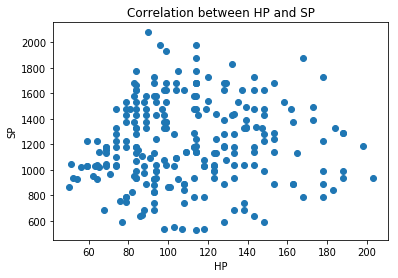

In [18]:
plt.scatter(ch3Result.SP, ch3Result.HP)
plt.ylabel("SP")
plt.xlabel("HP")
plt.title("Correlation between HP and SP")
plt.show()

## Are some types over- or under-represented?

In [19]:
digimons.columns

Index(['Number', 'Digimon', 'Stage', 'Type', 'Attribute', 'Memory',
       'Equip Slots', 'Lv 50 HP', 'Lv50 SP', 'Lv50 Atk', 'Lv50 Def',
       'Lv50 Int', 'Lv50 Spd'],
      dtype='object')

In [20]:
ch4Result = digimons.groupby(by=["Type"]).agg('count').iloc[:,:1]
ch4Result.head()

,Number
Type,
Data,60
Free,37
Vaccine,70
Virus,82


24.09638613462448
14.859437942504883
28.11245024204254
32.931727170944214


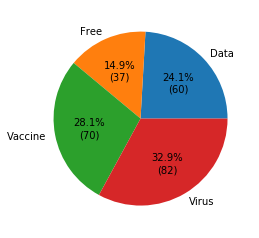

In [21]:
def participation(percent, allvals):
    print(percent)
    absolute = int(percent/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(percent, absolute)

plt.pie(ch4Result.Number, autopct=lambda percent: participation(percent, ch4Result.Number), labels=ch4Result.index)
plt.show()

From the above Pie chat we can deduce that "Free" type occurs very less, while "Virus" type occurs the most. And hence we can deduce that "Free" is under-represented and "Virus" is over-represented in the Dataset.

# Performing chi-squared test on 2 catagorical attributes

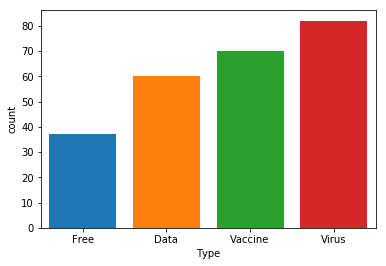

In [22]:
types = digimons.Type.value_counts()
types = types.sort_values()
sns.countplot(digimons.Type, saturation=1, order=types.index)

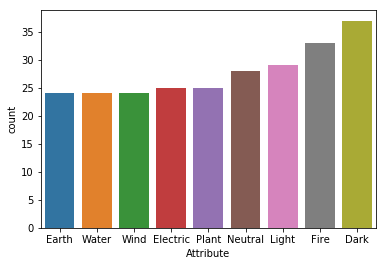

In [23]:
attributes = digimons.Attribute.value_counts()
attributes = attributes.sort_values()
sns.countplot(digimons.Attribute, order=attributes.index)

In [24]:
def chisqaure_test(df, col1, col2):
    groupSize = digimons.groupby([col1, col2]).size()
    groupSum = groupSize.unstack(col1)
    #Filling null values to 0 to prevent code to not throw any exceptions
    groupSum = groupSum.fillna(0)
    return chi2_contingency(groupSum)

Assuming significance level as 5%, meaning I am assuming Confidence level of 95% to check if 2 categorical values have any relationship? 

In [33]:
chisqaure_test(digimons, 'Type', 'Attribute')

(88.03033202268932,
 3.046235014769864e-09,
 24,
 array([[ 8.91566265,  5.49799197, 10.40160643, 12.18473896],
        [ 5.78313253,  3.56626506,  6.74698795,  7.90361446],
        [ 6.02409639,  3.71485944,  7.02811245,  8.23293173],
        [ 7.95180723,  4.90361446,  9.27710843, 10.86746988],
        [ 6.98795181,  4.30923695,  8.15261044,  9.5502008 ],
        [ 6.74698795,  4.16064257,  7.87148594,  9.22088353],
        [ 6.02409639,  3.71485944,  7.02811245,  8.23293173],
        [ 5.78313253,  3.56626506,  6.74698795,  7.90361446],
        [ 5.78313253,  3.56626506,  6.74698795,  7.90361446]]))

**Clearly my p-value < significance value. Which means that I have enough evidence to proove that Type and Attribute share some relationship b/w them.**

In [26]:
chisqaure_test(digimons, 'Attribute', 'Stage')

(74.09777624477839,
 0.05306703774738181,
 56,
 array([[ 0.44578313,  0.28915663,  0.30120482,  0.39759036,  0.34939759,
          0.3373494 ,  0.30120482,  0.28915663,  0.28915663],
        [ 0.74297189,  0.48192771,  0.50200803,  0.6626506 ,  0.58232932,
          0.562249  ,  0.50200803,  0.48192771,  0.48192771],
        [ 8.02409639,  5.20481928,  5.42168675,  7.15662651,  6.28915663,
          6.07228916,  5.42168675,  5.20481928,  5.20481928],
        [ 1.63453815,  1.06024096,  1.10441767,  1.45783133,  1.2811245 ,
          1.23694779,  1.10441767,  1.06024096,  1.06024096],
        [10.99598394,  7.13253012,  7.42971888,  9.80722892,  8.6184739 ,
          8.32128514,  7.42971888,  7.13253012,  7.13253012],
        [ 5.64658635,  3.6626506 ,  3.81526104,  5.03614458,  4.42570281,
          4.27309237,  3.81526104,  3.6626506 ,  3.6626506 ],
        [ 8.6184739 ,  5.59036145,  5.82329317,  7.68674699,  6.75502008,
          6.52208835,  5.82329317,  5.59036145,  5.59036145],
 

**Here my p-value > significance value, meaning I do not have enough evidence to say that Attribute and Stage is related.**

### Lets check the correlation between these varaibles to check our Null hypothesis

In [35]:
(digimons['Type'].astype('category').cat.codes).corr((digimons['Attribute'].astype('category').cat.codes))

-0.24541050052504065

Correlation between Type and Attribute is Negative, meaning decreasing one variable tends to increase another

In [36]:
(digimons['Stage'].astype('category').cat.codes).corr((digimons['Attribute'].astype('category').cat.codes))

-0.03789234680698387

Correlation between Stage and Attribute is almost 0, meaning theres no relation between the 2

### Finished